**Step 6 - Model Selection**
- Identify Model Families

**Step 7 - Train the Model**
- Splitting the data
- Feature Engineering
- Training the Model
- Hyperparameter Tuning
- Model Validation
- Model Refinement
- Saving the Model

**Step 8 - Evaluate the Model**
- Choose Evaluation Metrics
- Evaluate the Model
- Repeat the Process ( Step 7 and 8 )

*Step 9 - Deploy the Model*
- *Choose a Deployment Environment*
- *Model Conversion*
- *Model Integration*
- *Testing*
- *Monitoring*
- *Maintenance*
    
**Step 10 - Communicate Results**
- Identify the Audience
- Choose the Right Format
- Visualize the Results
- Explain the Methodology
- Highlight the Insights
- Provide Recommendations
- Collect Feedback

In [1]:
def Model_logistic(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        log = LogisticRegression()

        log_cv = GridSearchCV(log, hp, cv=10)
        
        log_cv.fit(X_train, y_train)
        
        predictions = log_cv.predict(X_test)
        
        hp = log_cv.best_params_
        
    else:
        log = LogisticRegression(**hp)

        log.fit(X_train, y_train)

        predictions = log.predict(X_test)

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    dic = {'model': 'Logistic', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cm, dic

In [2]:
def Model_knn(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        knn = KNeighborsClassifier()

        knn_cv = GridSearchCV(knn, hp, cv=10)
        
        knn_cv.fit(X_train, y_train)
        
        predictions = knn_cv.predict(X_test)
        
        hp = knn_cv.best_params_
        
    else:
    
        knn = KNeighborsClassifier(**hp)

        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'KNN', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cr, cm, dic

In [3]:
def decision_tree(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        tree = DecisionTreeClassifier()

        tree_cv = GridSearchCV(tree, hp, cv=10)
        
        tree_cv.fit(X_train, y_train)
        
        predictions = tree_cv.predict(X_test)
        
        hp = tree_cv.best_params_
        
        tree = DecisionTreeClassifier(**hp)

        tree.fit(X_train, y_train)

        predictions = tree.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
        
    else:
    
        tree = DecisionTreeClassifier(**hp)

        tree.fit(X_train, y_train)

        predictions = tree.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(tree.feature_importances_,3)})
        

    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'Decision Tree', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return tree, cr, importances, cm, dic

In [4]:
def Model_random_forest(X_train, y_train, X_test, y_test, hp, grid_search=False):
    
    if grid_search:
        rfc = RandomForestClassifier()

        rfc_cv = GridSearchCV(rfc, hp, cv=10)
        
        rfc_cv.fit(X_train, y_train)
        
        predictions = rfc_cv.predict(X_test)
        
        hp = rfc_cv.best_params_
        
        rfc = RandomForestClassifier(**hp)

        rfc.fit(X_train, y_train)

        predictions = rfc.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
        
    else:
    
        rfc = RandomForestClassifier(**hp)

        rfc.fit(X_train, y_train)

        predictions = rfc.predict(X_test)
        
        importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
        
    accuracy = accuracy_score(y_test, predictions, normalize=True)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions)
    dic = {'model': 'Random Forest', 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'hp': json.dumps(hp)}
    return cr, importances, cm, dic

In [5]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df = pd.read_csv('Pathrise_preprocessed.csv')

## Step 6 - Model Selection

### Identify Model Families



The main goal of this analysis is to derive insights around:

**1- if a fellow will ultimately be placed at a company**

**2- and how long until a placement can be expected.**

in this notebook we are going to handle the first goal

for this goal the **palced** feature is the target


## Step 7 - Train the Model

### Feature Engineering

In [7]:
df_corr = df.corr()

<Axes: >

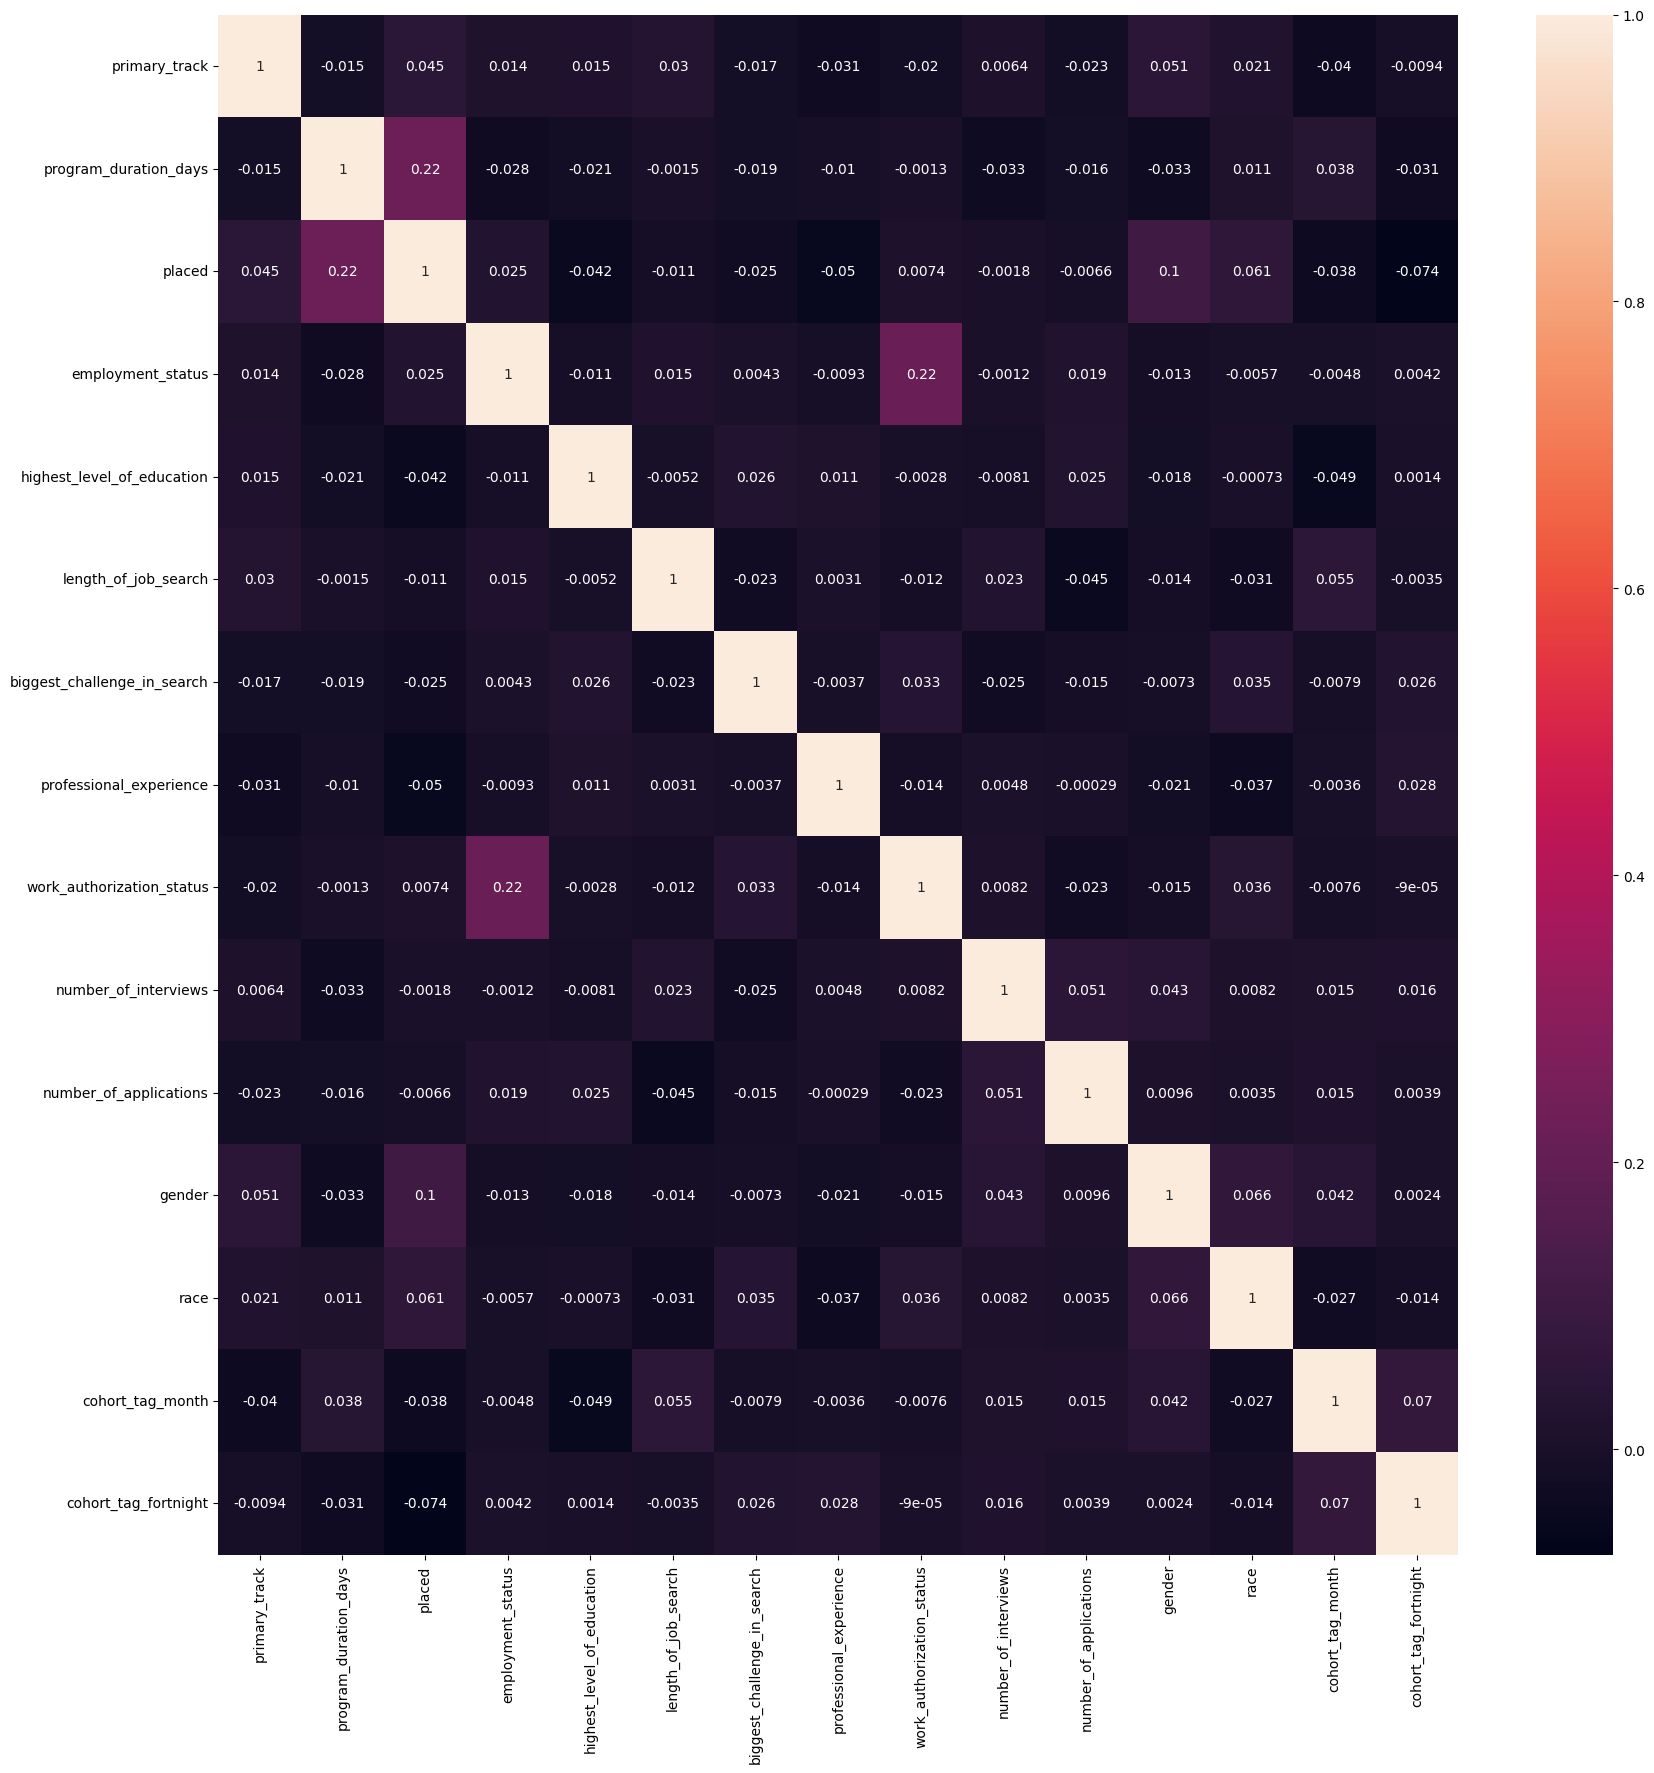

In [8]:
plt.figure(figsize=(20,20), dpi=100)

sns.heatmap(df_corr, annot=True)

### Splitting the data

In [9]:
# Remove the other target
df.drop('program_duration_days', axis=1, inplace=True)

X=df.drop('placed', axis=1)
y=df['placed']

# check for Imbalancment
y.value_counts()


placed
0    1018
1     935
Name: count, dtype: int64

seems OK so Split Dataset to Test and Train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Training the Model

In [11]:
df_results=pd.DataFrame()

#### Logistic Regression

In [12]:
hp = {'random_state':101}

cm, dic = Model_logistic(X_train, y_train, X_test, y_test, hp)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [13]:
lr_check_hp = {  'C':[0.01,0.1,1],
                 'penalty':['l2'],
                 'solver':['lbfgs'],
                 'random_state':[101]
              }

In [14]:
cm, dic = Model_logistic(X_train, y_train, X_test, y_test, lr_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

#### KNN Classification

In [15]:
hp = {}

cr_knn, cm_knn, dic = Model_knn(X_train, y_train, X_test, y_test, hp, False)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [16]:
knn_check_hp = {  'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1,2]
              }

In [17]:
cr_knn, cm_knn, dic = Model_knn(X_train, y_train, X_test, y_test, knn_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [18]:
#### Decision Tree

In [19]:
hp = {'random_state':101}
dt_tree, cr_dt, importances_dt, cm_dt, dic = decision_tree(X_train, y_train, X_test, y_test, hp, False)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [20]:
dt_check_hp = {  'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [2*n for n in range(1,10)],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'random_state':[101]
              }

In [21]:
dt_tree, cr_dt, importances_dt, cm_dt, dic = decision_tree(X_train, y_train, X_test, y_test, dt_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [22]:
#### Random Forest

In [23]:
dt_tree, cr_dt, importances_dt, cm_dt, dic = decision_tree(X_train, y_train, X_test, y_test, dt_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [24]:
rf_check_hp = {'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [20, 40, 60, 80, 90], 
               'random_state': [101]}

In [25]:
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(X_train, y_train, X_test, y_test, rf_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [27]:
df_results

,model,accuracy,precision,f1,hp
0,Logistic,0.542199,0.500000,0.498599,"{""random_state"": 101}"
1,Logistic,0.542199,0.500000,0.498599,"{""C"": 1, ""penalty"": ""l2"", ""random_state"": 101,..."
2,KNN,0.519182,0.475138,0.477778,{}
3,KNN,0.511509,0.457746,0.404984,"{""algorithm"": ""auto"", ""n_neighbors"": 8, ""p"": 1}"
4,Decision Tree,0.491049,0.445652,0.451791,"{""random_state"": 101}"
5,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_fea..."
6,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_fea..."
7,Random Forest,0.554987,0.514970,0.497110,"{""min_samples_leaf"": 4, ""min_samples_split"": 1..."


### Hyperparameter Tuning

### Model Validation

### Model Refinement

In [28]:
hp = {"min_samples_leaf": 1, "min_samples_split": 5, "n_estimators": 80, "random_state": 101}
columns_to_remove=['biggest_challenge_in_search', 'number_of_applications', 'cohort_tag_month', 
                    'work_authorization_status', 'number_of_interviews', 'cohort_tag_fortnight', 
                    'race', 'length_of_job_search', 'gender', 'employment_status']
for column in columns_to_remove:
    new_X_train = X_train.drop([column], axis=1)
    new_X_test = X_test.drop([column], axis=1)
    cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, hp, False)
    dic['hp'] = 'Removed {}'.format(column)
    df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [29]:
hp = {"min_samples_leaf": 1, "min_samples_split": 5, "n_estimators": 80, "random_state": 101}
columns_to_remove=['number_of_interviews']

new_X_train = X_train.drop(columns_to_remove, axis=1)
new_X_test = X_test.drop(columns_to_remove, axis=1)
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, hp, False)
df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [30]:
hp = {"random_state": 101}
columns_to_remove=['number_of_interviews']

new_X_train = X_train.drop(columns_to_remove, axis=1)
new_X_test = X_test.drop(columns_to_remove, axis=1)
cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, hp, False)
df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [31]:
rf_check_hp = {'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [20, 40, 60, 80, 90], 
               'random_state': [101]}

In [32]:
columns_to_remove=['number_of_interviews']

new_X_train = X_train.drop(columns_to_remove, axis=1)
new_X_test = X_test.drop(columns_to_remove, axis=1)

cr_rf, importances_rf, cm_rf, dic = Model_random_forest(new_X_train, y_train, new_X_test, y_test, rf_check_hp, True)

df_results = pd.concat([df_results, pd.DataFrame(dic, index=[0])], ignore_index=True)

In [33]:
df_results

,model,accuracy,precision,f1,hp
0,Logistic,0.542199,0.500000,0.498599,"{""random_state"": 101}"
1,Logistic,0.542199,0.500000,0.498599,"{""C"": 1, ""penalty"": ""l2"", ""random_state"": 101,..."
2,KNN,0.519182,0.475138,0.477778,{}
3,KNN,0.511509,0.457746,0.404984,"{""algorithm"": ""auto"", ""n_neighbors"": 8, ""p"": 1}"
4,Decision Tree,0.491049,0.445652,0.451791,"{""random_state"": 101}"
5,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_fea..."
6,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_fea..."
7,Random Forest,0.554987,0.514970,0.497110,"{""min_samples_leaf"": 4, ""min_samples_split"": 1..."
8,Random Forest,0.580563,0.545455,0.523256,Removed biggest_challenge_in_search
9,Random Forest,0.570332,0.531073,0.528090,Removed number_of_applications


In [34]:
importances_dt.sort_values('importance', ascending=False)

,feature,importance
0,primary_track,0.210
5,professional_experience,0.131
2,highest_level_of_education,0.114
1,employment_status,0.088
9,gender,0.087
3,length_of_job_search,0.084
10,race,0.075
12,cohort_tag_fortnight,0.071
7,number_of_interviews,0.046
6,work_authorization_status,0.036


In [39]:
accuracies = df_results[['accuracy', 'model']].groupby('model')['accuracy'].max()

In [40]:
accuracies

model
Decision Tree    0.529412
KNN              0.519182
Logistic         0.542199
Random Forest    0.583120
Name: accuracy, dtype: float64

In [45]:
type(accuracies)

pandas.core.series.Series

<Axes: xlabel='model', ylabel='accuracy'>

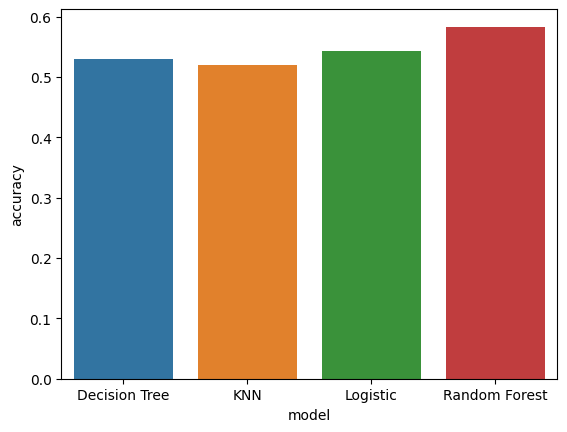

In [47]:
sns.barplot(x=accuracies.index, y=accuracies)

In [49]:
df_results

,model,accuracy,precision,f1,hp
0,Logistic,0.542199,0.500000,0.498599,"{""random_state"": 101}"
1,Logistic,0.542199,0.500000,0.498599,"{""C"": 1, ""penalty"": ""l2"", ""random_state"": 101,..."
2,KNN,0.519182,0.475138,0.477778,{}
3,KNN,0.511509,0.457746,0.404984,"{""algorithm"": ""auto"", ""n_neighbors"": 8, ""p"": 1}"
4,Decision Tree,0.491049,0.445652,0.451791,"{""random_state"": 101}"
5,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_fea..."
6,Decision Tree,0.529412,0.486034,0.486034,"{""criterion"": ""gini"", ""max_depth"": 8, ""max_fea..."
7,Random Forest,0.554987,0.514970,0.497110,"{""min_samples_leaf"": 4, ""min_samples_split"": 1..."
8,Random Forest,0.580563,0.545455,0.523256,Removed biggest_challenge_in_search
9,Random Forest,0.570332,0.531073,0.528090,Removed number_of_applications


In [69]:
dic

{'model': 'Random Forest',
 'accuracy': 0.5831202046035806,
 'precision': 0.5449438202247191,
 'f1': 0.5434173669467788,
 'hp': '{"min_samples_leaf": 4, "min_samples_split": 2, "n_estimators": 80, "random_state": 101}'}

In [51]:
precisions = df_results[['precision', 'model']].groupby('model')['precision'].max()

In [52]:
f1s = df_results[['f1', 'model']].groupby('model')['f1'].max()

<Axes: xlabel='model', ylabel='precision'>

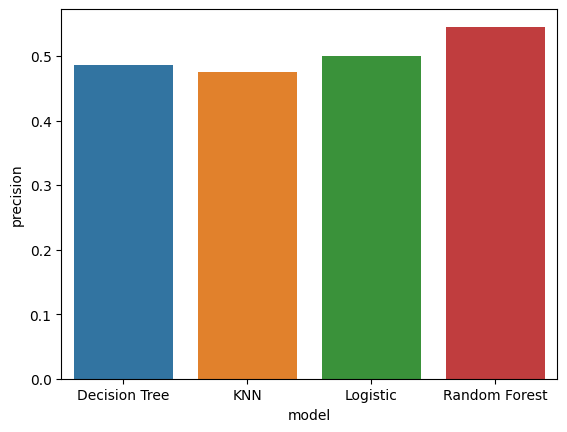

In [53]:
sns.barplot(x=precisions.index, y=precisions)

<Axes: xlabel='model', ylabel='f1'>

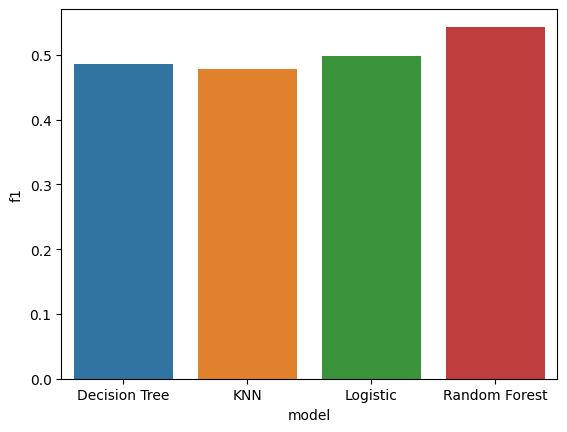

In [54]:
sns.barplot(x=f1s.index, y=f1s)

In [56]:
print(cr_rf)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       212
           1       0.54      0.54      0.54       179

    accuracy                           0.58       391
   macro avg       0.58      0.58      0.58       391
weighted avg       0.58      0.58      0.58       391



In [68]:
importances_rf.sort_values('importance', ascending=False).reset_index(drop=True)

,feature,importance
0,number_of_applications,0.155
1,cohort_tag_month,0.127
2,biggest_challenge_in_search,0.089
3,race,0.087
4,employment_status,0.084
5,professional_experience,0.084
6,work_authorization_status,0.082
7,length_of_job_search,0.075
8,primary_track,0.060
9,highest_level_of_education,0.059


In [57]:
cm_rf

array([[131,  81],
       [ 82,  97]], dtype=int64)

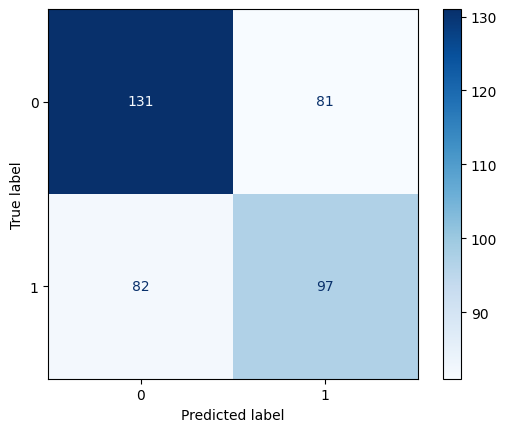

In [62]:
disp = ConfusionMatrixDisplay(cm_rf)
disp.plot(cmap='Blues')
plt.show()

In [60]:
plt.show()

### Saving the Model

## Step 8 - Evaluate the Model

### Choose Evaluation Metrics

### Evaluate the Model

### Repeat the Process ( Step 7 and 8 )

## Step 9 - Deploy the Model

### Choose a Deployment Environment

### Model Conversion

### Model Integration

### Testing

### Monitoring

### Maintenance

## Step 10 - Communicate Results

### Identify the Audience

### Choose the Right Format

### Visualize the Results

### Explain the Methodology

### Highlight the Insights

### Provide Recommendations

### Collect Feedback